Steps
1. Load the Required Libraries
2. Read the data from the dataset
3. Handling missing values and replacing missing values with nan from numpy and replace with mean of all the other values
4. Feature Engineering
5. Split the attribites into dependent and independent attributes
6. Splitting the dataset intro training set and test set
7. Train the Extreme Gradient Boost Model
8. Retraining the model using Resampled data
9. Evaluate the retrained model
10. Feature Importance Visualization
11. Apply Shapley Additive Technique to the data

1. Load the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier as eXTremeGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,recall_score

C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\dtale\utils.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version
C:\Users\Frank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



2. Read the data from the dataset

Dataset shape: (253680, 22)

Data types:
 Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Missing values:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity  

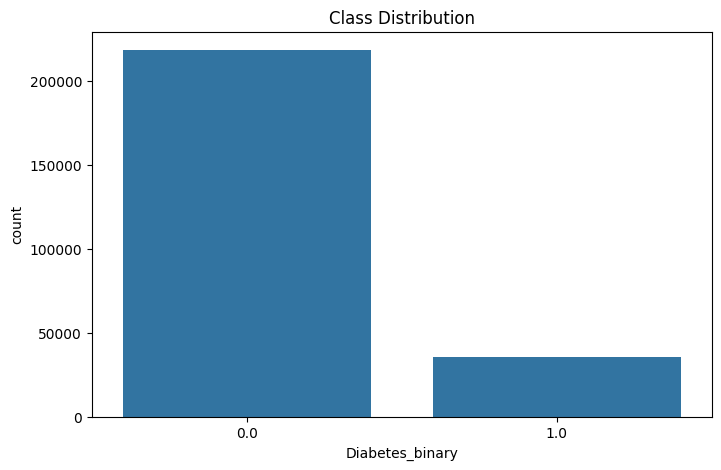

In [3]:
df = pd.read_csv("../../Datasets/diabetes_binary_health_indicators_BRFSS2015.csv", encoding='latin1')
# Initial data summary
print(f"Dataset shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Class Distribution')
plt.show()

In [4]:
# Drop irrelevant columns
cols_to_drop = ['CholCheck','Smoker','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','MentHlth','Sex','Education']
print(f"Dropping columns: {cols_to_drop} as they are not relevant for prediction")
df.drop(columns=cols_to_drop, inplace=True)

Dropping columns: ['CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Sex', 'Education'] as they are not relevant for prediction


3. Handling missing values and replacing missing values with nan from numpy and replace with mean of all the other values

In [5]:
print(df.isnull().sum())
print(df.isna().sum())
dtale.show(df)

Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Income                  0
dtype: int64
Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
GenHlth                 0
PhysHlth                0
DiffWalk                0
Age                     0
Income                  0
dtype: int64


4. Feature Engineering

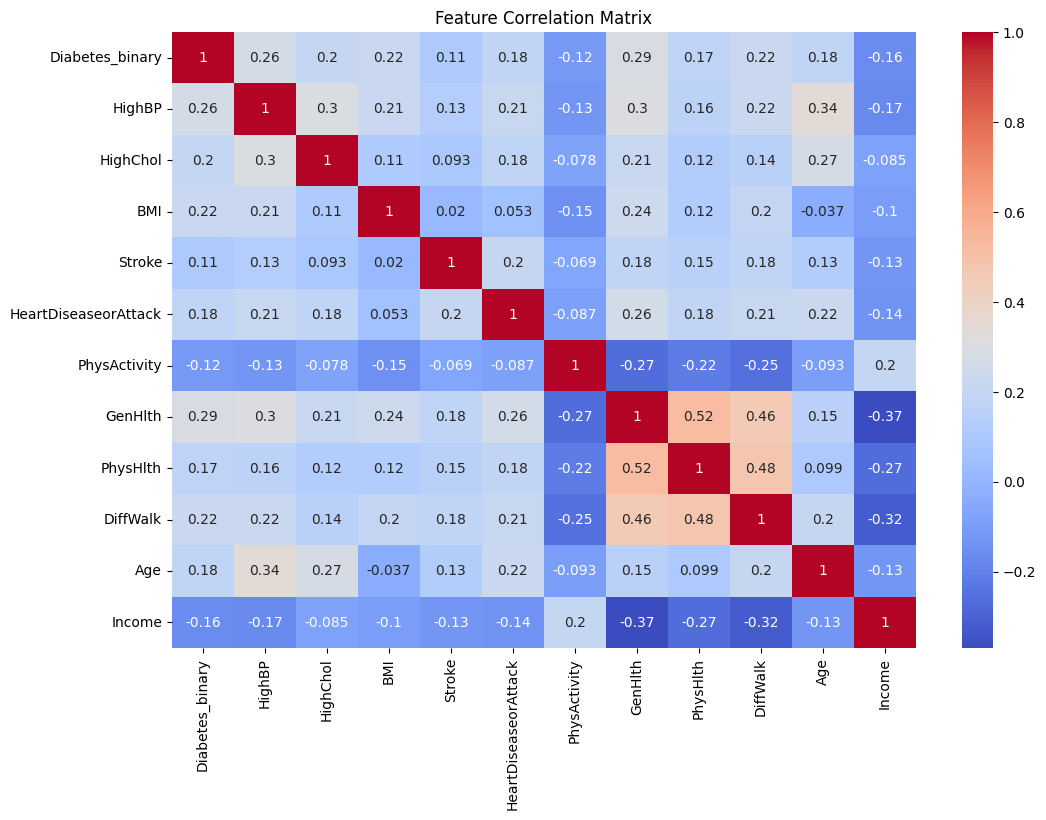

In [6]:
# Add feature correlation analysis
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

5. Split the attribites into dependent and independent attributes

In [12]:
Y = df.iloc[:, 0]  # First column as target
X = df.iloc[:, 1:]  # All other columns as features
dtale.show(Y, ignore_duplicate=True)

6. Splitting the dataset intro training set and test set

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

7. Train the Random Forest Model

[0]	validation_0-logloss:0.40750
[10]	validation_0-logloss:0.39393
[10]	validation_0-logloss:0.39393
[20]	validation_0-logloss:0.38293
[20]	validation_0-logloss:0.38293
[30]	validation_0-logloss:0.37394
[30]	validation_0-logloss:0.37394
[40]	validation_0-logloss:0.36643
[40]	validation_0-logloss:0.36643
[50]	validation_0-logloss:0.35996
[50]	validation_0-logloss:0.35996
[60]	validation_0-logloss:0.35457
[60]	validation_0-logloss:0.35457
[70]	validation_0-logloss:0.34995
[70]	validation_0-logloss:0.34995
[80]	validation_0-logloss:0.34606
[80]	validation_0-logloss:0.34606
[90]	validation_0-logloss:0.34263
[90]	validation_0-logloss:0.34263
[100]	validation_0-logloss:0.33962
[100]	validation_0-logloss:0.33962
[110]	validation_0-logloss:0.33686
[110]	validation_0-logloss:0.33686
[120]	validation_0-logloss:0.33457
[120]	validation_0-logloss:0.33457
[130]	validation_0-logloss:0.33250
[130]	validation_0-logloss:0.33250
[140]	validation_0-logloss:0.33070
[140]	validation_0-logloss:0.33070
[150]

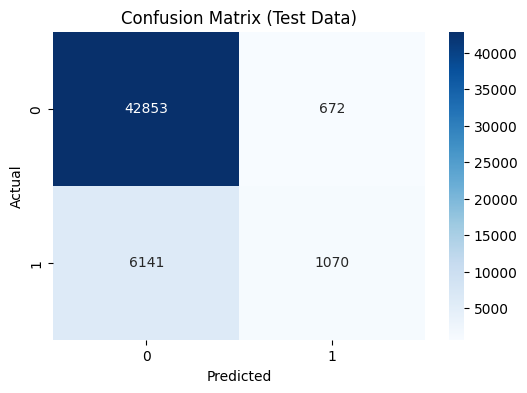

              precision    recall  f1-score       support
0.0            0.874658  0.984561  0.926361  43525.000000
1.0            0.614237  0.148384  0.239026   7211.000000
accuracy       0.865717  0.865717  0.865717      0.865717
macro avg      0.744447  0.566473  0.582694  50736.000000
weighted avg   0.837645  0.865717  0.828672  50736.000000


In [14]:
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'logloss',
    'random_state': 42
}
model = eXTremeGradientBoostingClassifier(**xgb_params)
model.fit(X_train, Y_train,
          eval_set=[(X_test, Y_test)],
          verbose=10)

# Display confusion matrix for the model on test data
from sklearn.metrics import confusion_matrix, classification_report
y_pred_train = model.predict(X_test)
cm_train = confusion_matrix(Y_test, y_pred_train)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

# Display evaluation matrix (classification report)
import pandas as pd
report_train = classification_report(Y_test, y_pred_train, output_dict=True)
df_report_train = pd.DataFrame(report_train).transpose()
print(df_report_train)

8. Retraining the model using Resampled data

In [15]:
smote_enn = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, Y_train_res = smote_enn.fit_resample(X_train, Y_train)
print(pd.Series(Y_train_res).value_counts())

Diabetes_binary
0.0    174809
1.0    174809
Name: count, dtype: int64


In [16]:
model = eXTremeGradientBoostingClassifier( random_state= 42)
model.fit(X_train_res, Y_train_res) 
Kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_res, Y_train_res, cv=Kfold, scoring='accuracy')

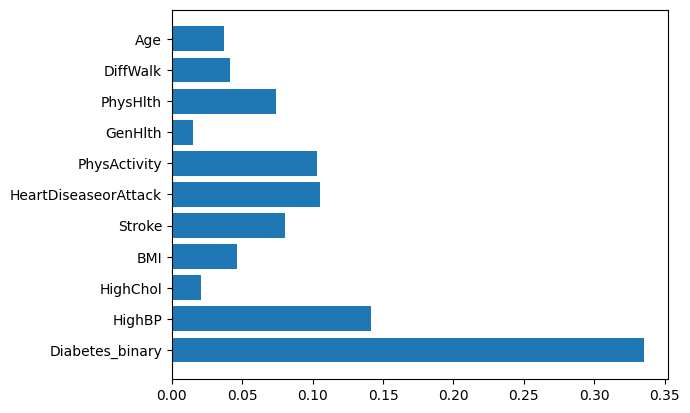

In [17]:
importances = model.feature_importances_
features = df.columns[:-1]
plt.barh(features, importances)
plt.show()

9. Evaluate the retrained model

              precision  recall  f1-score     support
0.0              0.8904  0.9426    0.9158  43525.0000
1.0              0.4640  0.3000    0.3644   7211.0000
accuracy         0.8512  0.8512    0.8512      0.8512
macro avg        0.6772  0.6213    0.6401  50736.0000
weighted avg     0.8298  0.8512    0.8374  50736.0000
ROC-AUC: 0.8112
Sensitivity: 0.3000
Specificity: 0.9426
Confusion Matrix:
[[41026  2499]
 [ 5048  2163]]
Mean Accuracy:0.8882 (+/- 0.0015)


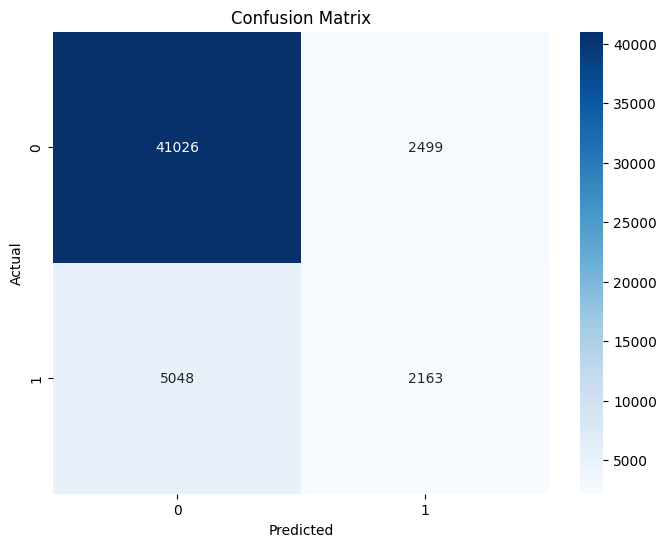

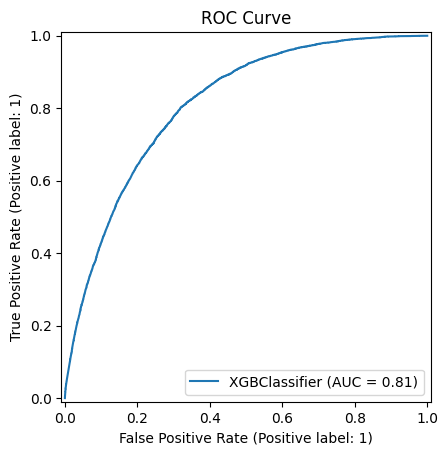

In [18]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
sensitivity = recall_score(Y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_test, y_proba)
cm = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)


report = classification_report(Y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

pd.set_option("display.precision", 4)
print(df_report)
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(Y_test, y_pred)}")
print(f"Mean Accuracy:{scores.mean():.4f} (+/- {scores.std():.4f})")# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
    
    # Plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.title('ROC Curve')
plt.show()

10. Feature Importance Visualization

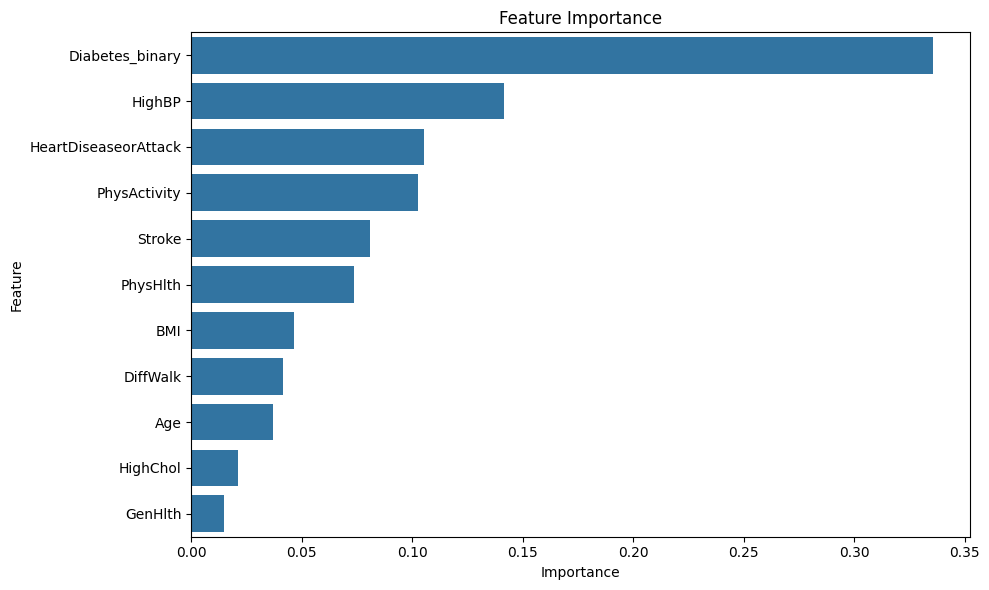

In [19]:
# Feature importance analysis
importance = model.feature_importances_
features = df.columns[:-1]

# Create DataFrame and sort
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

11. Apply Shapley Additive Technique to the data

In [20]:
#get the SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train_res)
print(shap_values.shape)

(349618, 11)


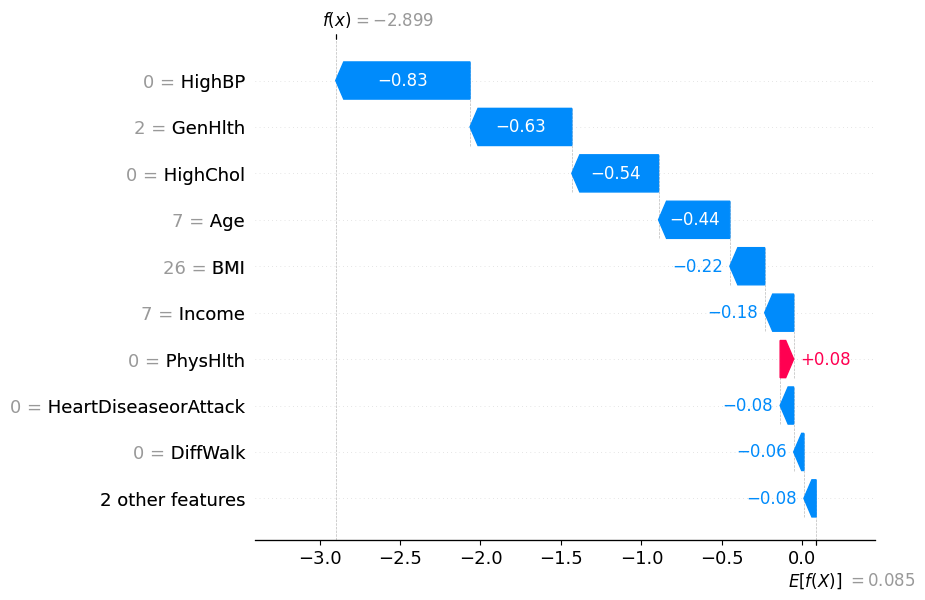

In [21]:
#Waterfall plot for the first observation
shap.plots.waterfall(shap_values[0])

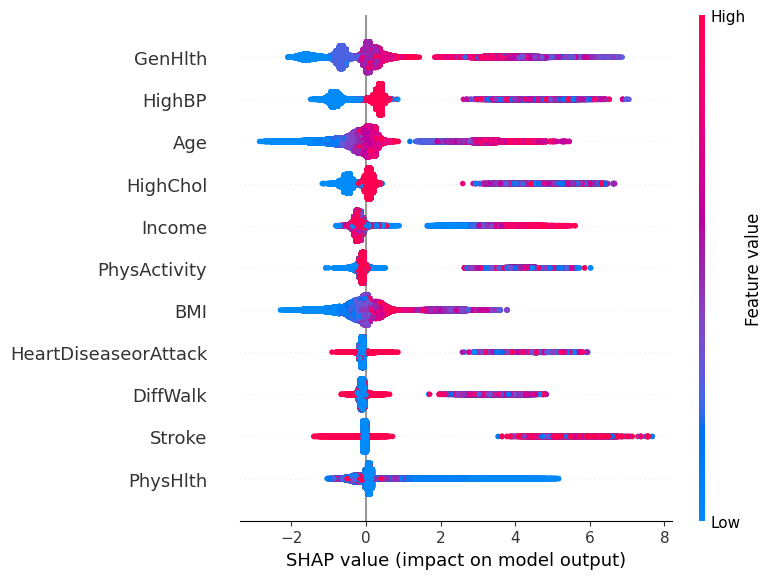

In [22]:
shap.summary_plot(shap_values, X_train_res)